# Exercício de Fixação

1. Use numpy para criar uma matriz (dataset) composta por valores numéricos aleatórios com 200 linhas (instâncias) e 12 colunas (características). Apresente o dataset.

In [12]:
import numpy as np
import pandas as pd

# Criando uma matriz 200x12 com valores aleatórios entre 0 e 1
np.random.seed(42) # Definindo uma semente para reproduzir o resultado
dados = np.random.rand(200, 12) # Criando e populando a matriz

dados

array([[0.37454012, 0.95071431, 0.73199394, ..., 0.70807258, 0.02058449,
        0.96990985],
       [0.83244264, 0.21233911, 0.18182497, ..., 0.13949386, 0.29214465,
        0.36636184],
       [0.45606998, 0.78517596, 0.19967378, ..., 0.94888554, 0.96563203,
        0.80839735],
       ...,
       [0.57719989, 0.04373907, 0.1230033 , ..., 0.42993108, 0.67296662,
        0.27538117],
       [0.3063135 , 0.78898516, 0.44641952, ..., 0.58219875, 0.37117242,
        0.60107417],
       [0.70558586, 0.68840502, 0.37455289, ..., 0.02544776, 0.64582239,
        0.63690232]])

2. Converta o dataset do exercício 1 em um dataframe de pandas. As instâncias devem ser numeradas de 0 a 199 e as características nomeadas com letras de "a" a "l" (inclua "k" como coluna). Apresente o dataset no formato dataframe. 

In [13]:
# Converta dados em um dataframe de pandas
df = pd.DataFrame(dados)

# As instâncias devem ser numeradas de 0 a 199
df.index = range(200)

# as características nomeadas com letras de "a" a "l"
df.columns = list('abcdefghijkl')

# Apresente o dataset no formato dataframe
df.head()

,a,b,c,d,e,f,g,h,i,j,k,l
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,0.020584,0.969910
1,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,0.611853,0.139494,0.292145,0.366362
2,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397
3,0.304614,0.097672,0.684233,0.440152,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068
4,0.546710,0.184854,0.969585,0.775133,0.939499,0.894827,0.597900,0.921874,0.088493,0.195983,0.045227,0.325330


3. Mostre apenas as instâncias ímpares e as características "b", "e", "f" do dataset criado no exercício 2 ordenados crescentemente pelos valores da característica "f".

In [14]:
# Mostre apenas as instâncias ímpares e as características "b", "e", "f" de df
df_3 = df.loc[1::2, ["b", "e", "f"]]

# ordenados crescentemente pelos valores da característica "f"
df_3 = df_3.sort_values(by="f")

df_3.head()

,b,e,f
89,0.287239,0.042093,0.017874
87,0.615863,0.870099,0.021269
31,0.683007,0.844875,0.023272
191,0.516573,0.219069,0.036721
81,0.214940,0.595078,0.051426


4. Apresente a soma dos valores, os valores mínimos e máximos, a média e o desvio padrão de cada coluna do dataset do exercício 3. Apresente também o intervalo de confiança de cada característica.

In [15]:
from numpy import sqrt
from scipy import stats

# Apresente a soma dos valores, os valores mínimos e máximos, a média e o desvio padrão de cada coluna de df_3
df_sum = df_3.sum()

df_min = df_3.min()

df_max = df_3.max()

df_mean = df_3.mean()

df_std = df_3.std()

# Apresente também o intervalo de confiança de cada característica.
df_confidence_interval = df_3.quantile()
stats = [
    df_sum,
    df_min,
    df_max,
    df_mean,
    df_std,
    df_confidence_interval
]

df_4 = pd.DataFrame(stats, index=['Soma', 'Mínimo', 'Máximo', 'Média', 'Desvio Padrão', 'Intervalo de Confiança'])

df_4


,b,e,f
Soma,51.760957,44.701758,48.174164
Mínimo,0.009197,0.005062,0.017874
Máximo,0.996334,0.996334,0.991810
Média,0.517610,0.447018,0.481742
Desvio Padrão,0.269861,0.313007,0.286393
Intervalo de Confiança,0.533245,0.417877,0.473215


5. Faça um gráfico de caixas com dados de cada característica (coluna) do dataframe do exercício 2.

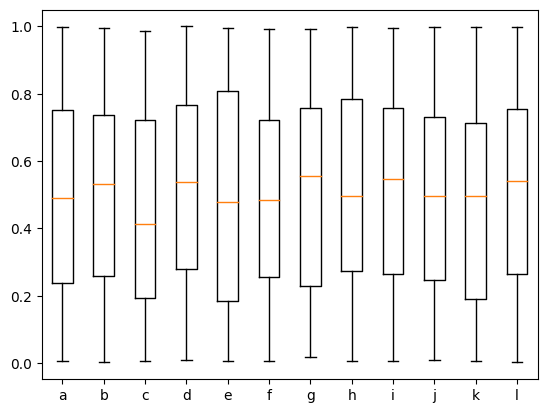

In [16]:
import matplotlib.pyplot as plt

plt.boxplot(df, labels=df.columns)
plt.show()

6. Obtenha média, desvio padrão e intervalo de confiança de cada característica da base iris. Contraste os resultados com os obtidos fazendo um gráfico de barras com intervalo de confiança.

In [17]:
from sklearn.datasets import load_iris 

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)

In [18]:
from numpy import mean, std
from scipy import stats

for caract in range(X.shape[1]):
    values = df.iloc[:, caract]
    x_mean, x_std = mean(values), std(values)
    print(df.columns[caract])
    print('mean: ', x_mean) 
    print('standard deviation: ', x_std)
    print('95% confidence interval method:',
       stats.norm.interval(0.95, loc=x_mean, 
                           scale=x_std/sqrt(len(values))))
    print()

sepal length (cm)
mean:  5.843333333333334
standard deviation:  0.8253012917851409
95% confidence interval method: (5.71126004639192, 5.975406620274748)

sepal width (cm)
mean:  3.0573333333333337
standard deviation:  0.4344109677354946
95% confidence interval method: (2.987814377088729, 3.1268522895779385)

petal length (cm)
mean:  3.7580000000000005
standard deviation:  1.759404065775303
95% confidence interval method: (3.4764418825730785, 4.039558117426923)

petal width (cm)
mean:  1.1993333333333336
standard deviation:  0.7596926279021594
95% confidence interval method: (1.0777594264087826, 1.3209072402578845)



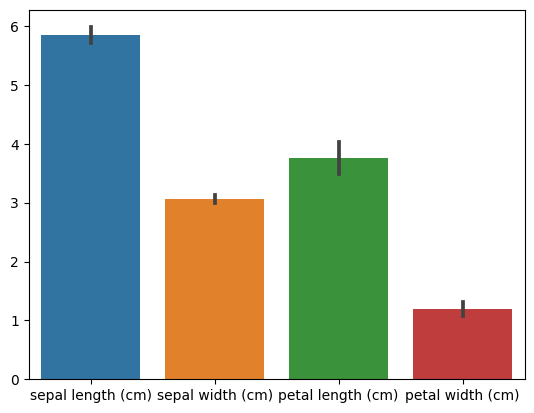

In [19]:
import seaborn as sns

sns.barplot(data=df)
plt.show()

7. Faça um histograma com 7 faixas equidistantes de valores para a característica sepal_width da base iris.

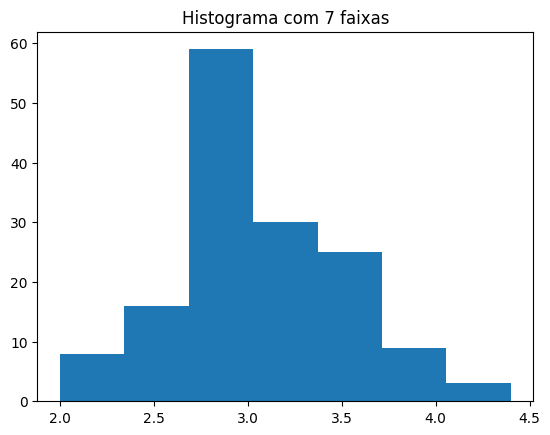

In [20]:
# Criando o histograma com 7 faixas
plt.hist(df.loc[:, 'sepal width (cm)'], bins = 7)
plt.title('Histograma com 7 faixas')

plt.show()

8. Faça um gráfico de dispersão apresentando os dados das caraterísticas sepal_length e sepal_width diferenciando os exemplos de cada classe.

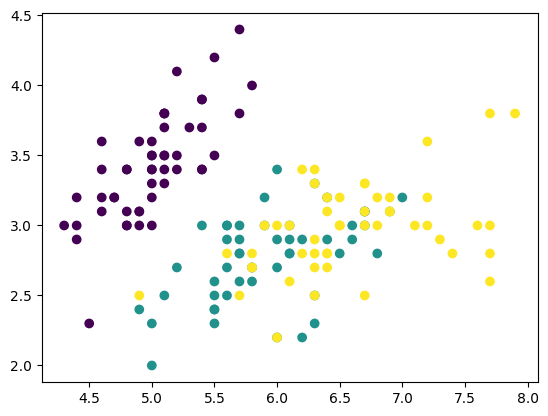

In [21]:
# Gráfico de dispersão do sepal length vs sepal width
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=y)
plt.show()

9. Apresente um gráfico com a projeção TSNE criado no exercício 1.

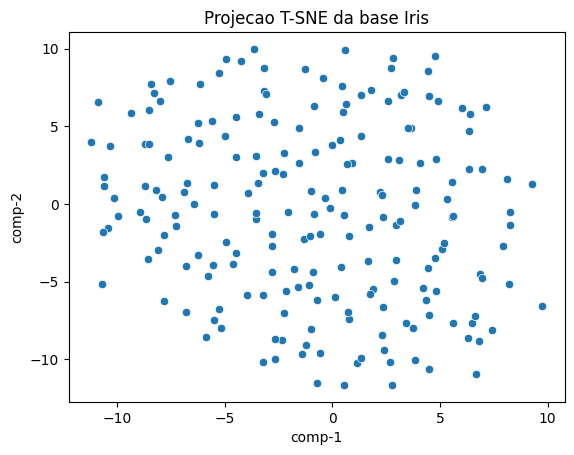

In [24]:
from sklearn.manifold import TSNE

tnse = TSNE(n_components=2, random_state=0)

tnse_results = tnse.fit_transform(dados)

df = pd.DataFrame()
df["comp-1"] = tnse_results[:,0]
df["comp-2"] = tnse_results[:,1]

output = sns.scatterplot(data=df, x="comp-1", y="comp-2").set(title=
                "Projecao T-SNE da base Iris")